In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
df = pd.read_csv('medical_dataset.csv')

In [3]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (1000, 19)

Columns: ['patient_id', 'age', 'gender', 'blood_type', 'bmi', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'heart_rate', 'temperature', 'glucose_level', 'cholesterol', 'fatigue', 'headache', 'nausea', 'chest_pain', 'shortness_of_breath', 'joint_pain', 'dizziness', 'diagnosis']

Data Types:
 patient_id                    int64
age                           int64
gender                       object
blood_type                   object
bmi                         float64
blood_pressure_systolic       int64
blood_pressure_diastolic      int64
heart_rate                    int64
temperature                 float64
glucose_level               float64
cholesterol                   int64
fatigue                       int64
headache                      int64
nausea                        int64
chest_pain                    int64
shortness_of_breath           int64
joint_pain                    int64
dizziness                     int64
diagnosis              

In [4]:
print("\nNumerical Features Summary:")
numerical_summary=df.describe()
display(numerical_summary)
print("\nCategorical Features Summary:")
categorical_summary=df.select_dtypes(include=['object']).describe()
display(categorical_summary)


Numerical Features Summary:


,patient_id,age,bmi,blood_pressure_systolic,blood_pressure_diastolic,heart_rate,temperature,glucose_level,cholesterol,fatigue,headache,nausea,chest_pain,shortness_of_breath,joint_pain,dizziness
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.944000,26.108100,119.486000,79.05100,74.211000,36.992550,101.569685,191.098000,4.889000,4.848000,4.915000,4.999000,5.024000,4.870000,4.997000
std,288.819436,14.286671,4.760803,15.213193,9.47524,11.658319,0.517166,24.177647,35.636082,3.163018,3.119074,3.139049,3.261232,3.130691,3.134793,3.158951
min,1.000000,18.000000,16.000000,90.000000,60.00000,50.000000,35.847031,54.921880,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,35.000000,22.800000,109.000000,72.75000,66.750000,36.635936,81.124556,166.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,500.500000,45.000000,26.000000,119.000000,79.00000,74.000000,36.989326,99.845128,190.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,750.250000,54.000000,29.300000,130.000000,85.25000,82.000000,37.351250,118.539325,216.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,90.000000,41.700000,178.000000,111.00000,112.000000,38.681170,183.892907,303.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000



Categorical Features Summary:


,gender,blood_type,diagnosis
count,1000,1000,1000
unique,2,8,5
top,F,B-,Healthy
freq,511,143,950


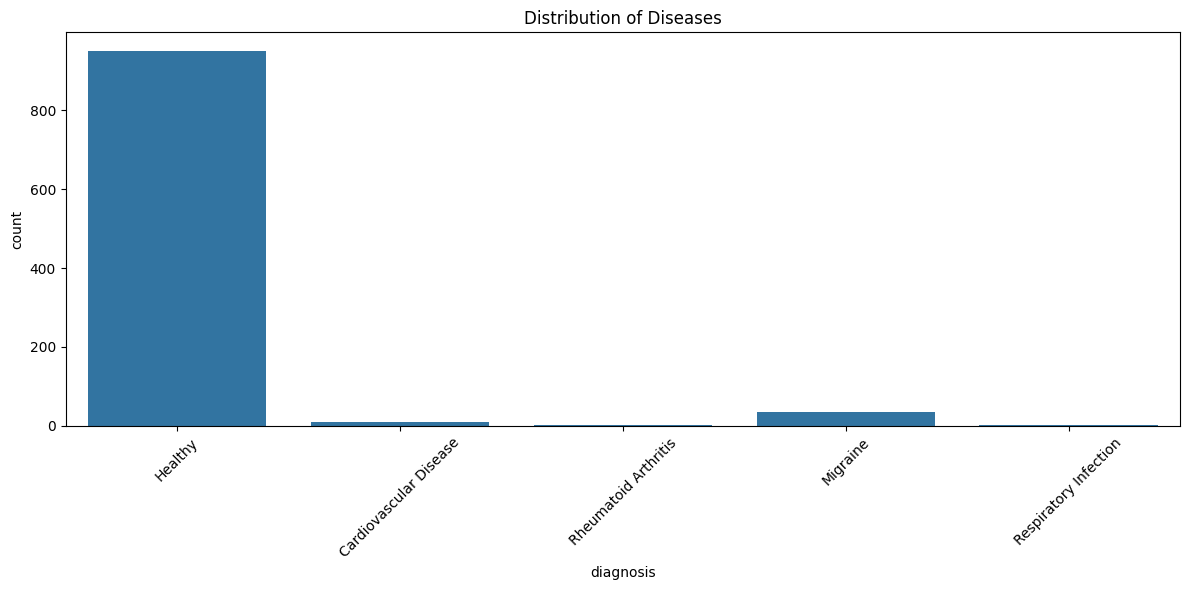

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='diagnosis')
plt.title('Distribution of Diseases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

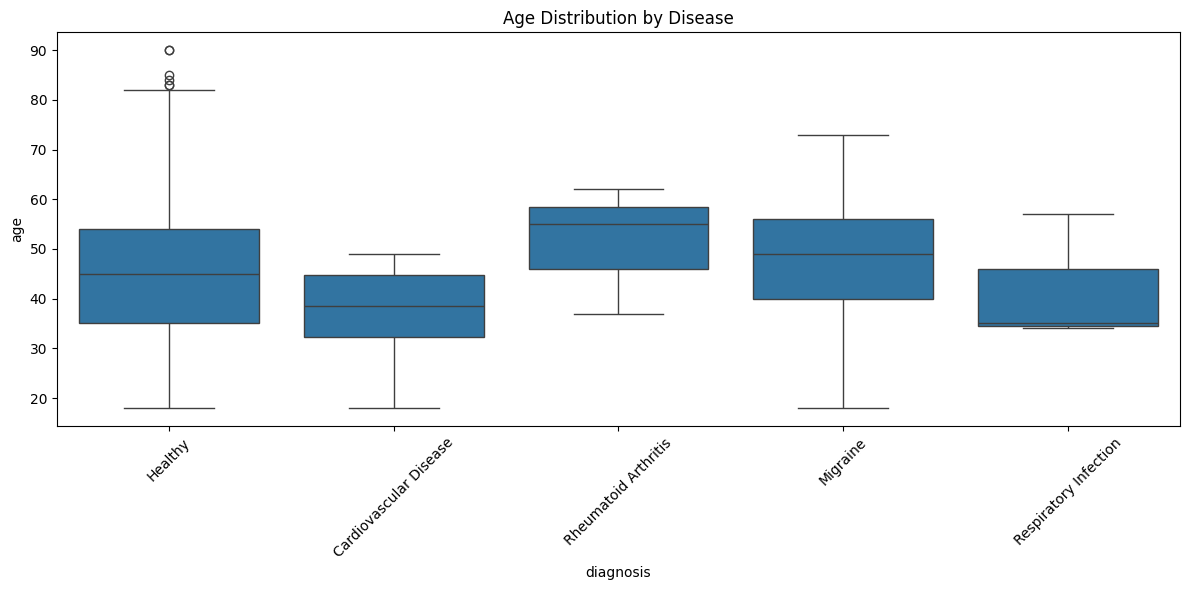

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='diagnosis', y='age')
plt.title('Age Distribution by Disease')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

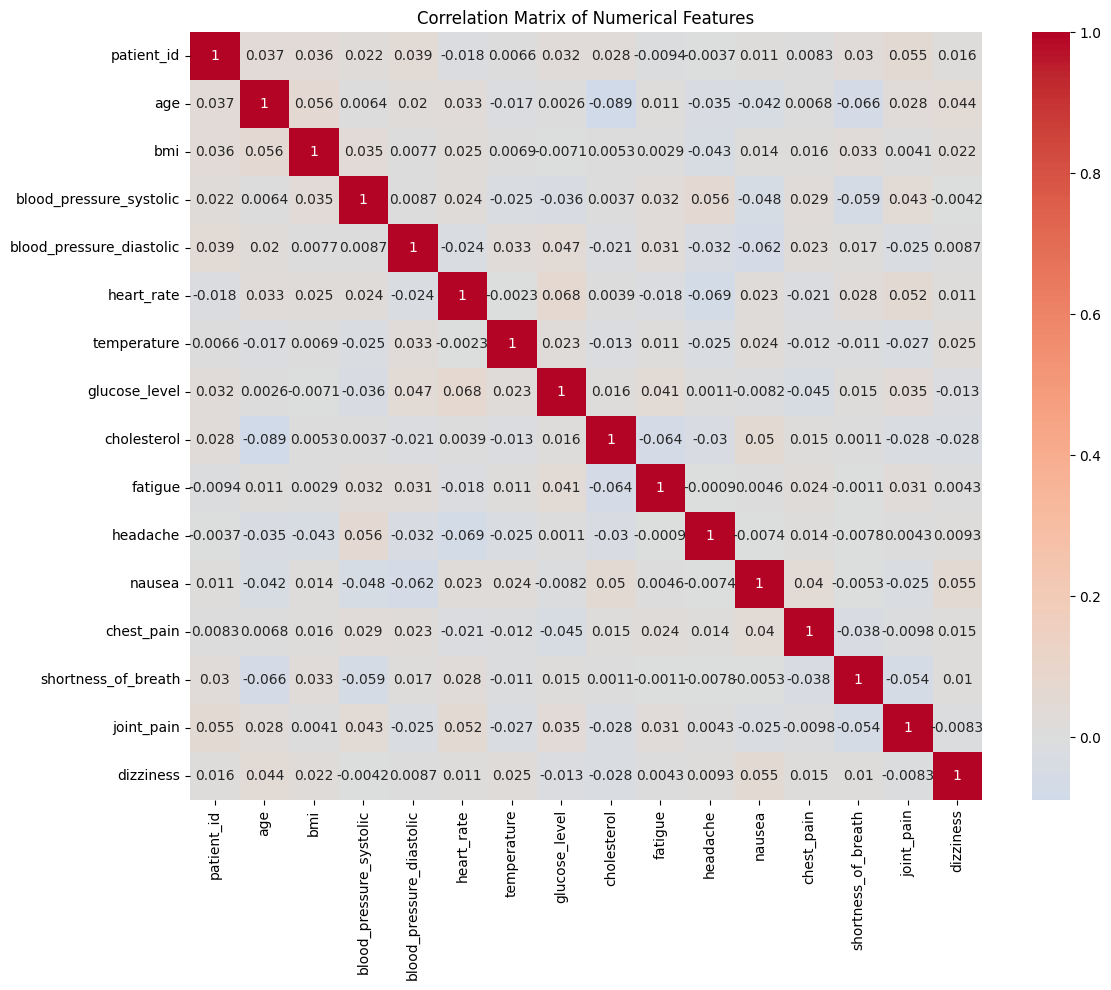

In [7]:

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


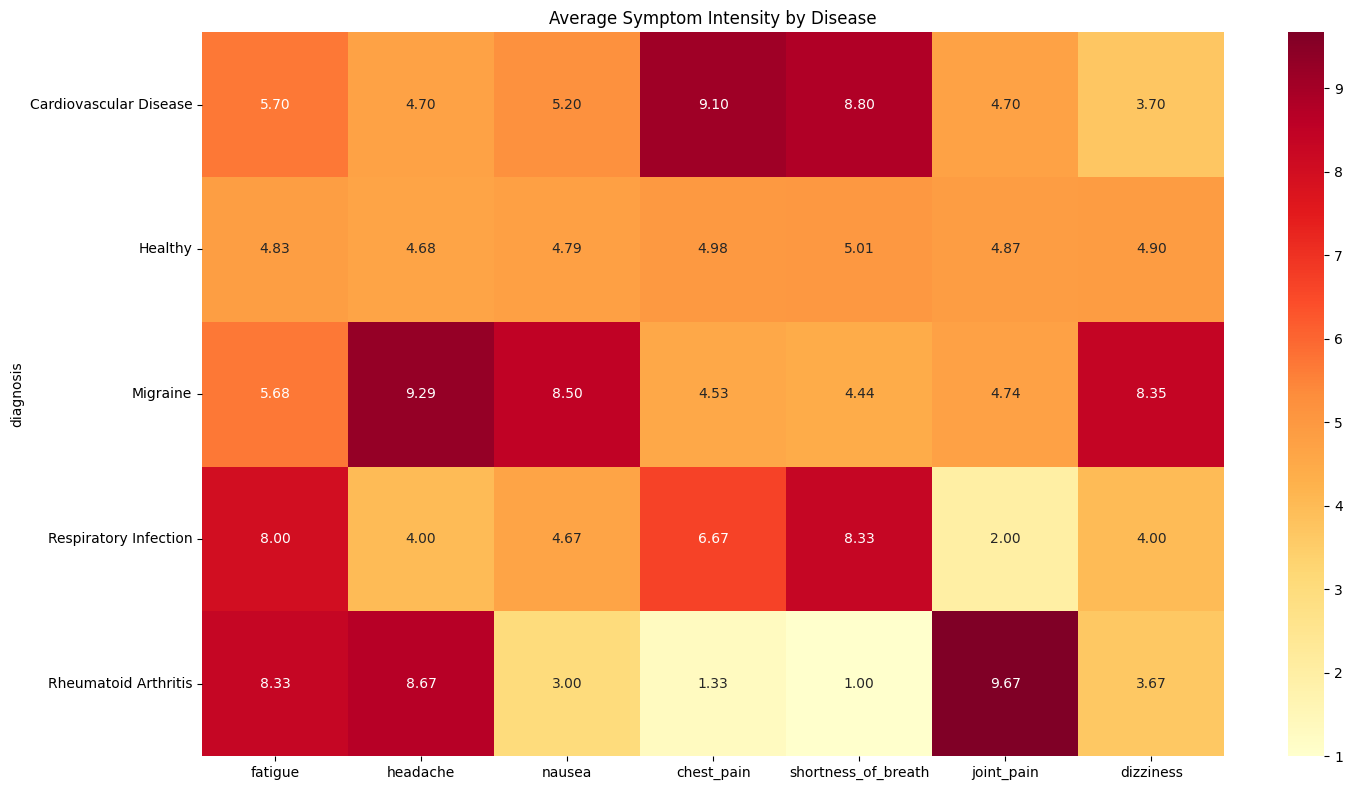

In [8]:
symptoms = ['fatigue', 'headache', 'nausea', 'chest_pain', 'shortness_of_breath', 'joint_pain', 'dizziness']
plt.figure(figsize=(15, 8))
df_symptoms_mean = df.groupby('diagnosis')[symptoms].mean()
sns.heatmap(df_symptoms_mean, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Symptom Intensity by Disease')
plt.tight_layout()
plt.show()

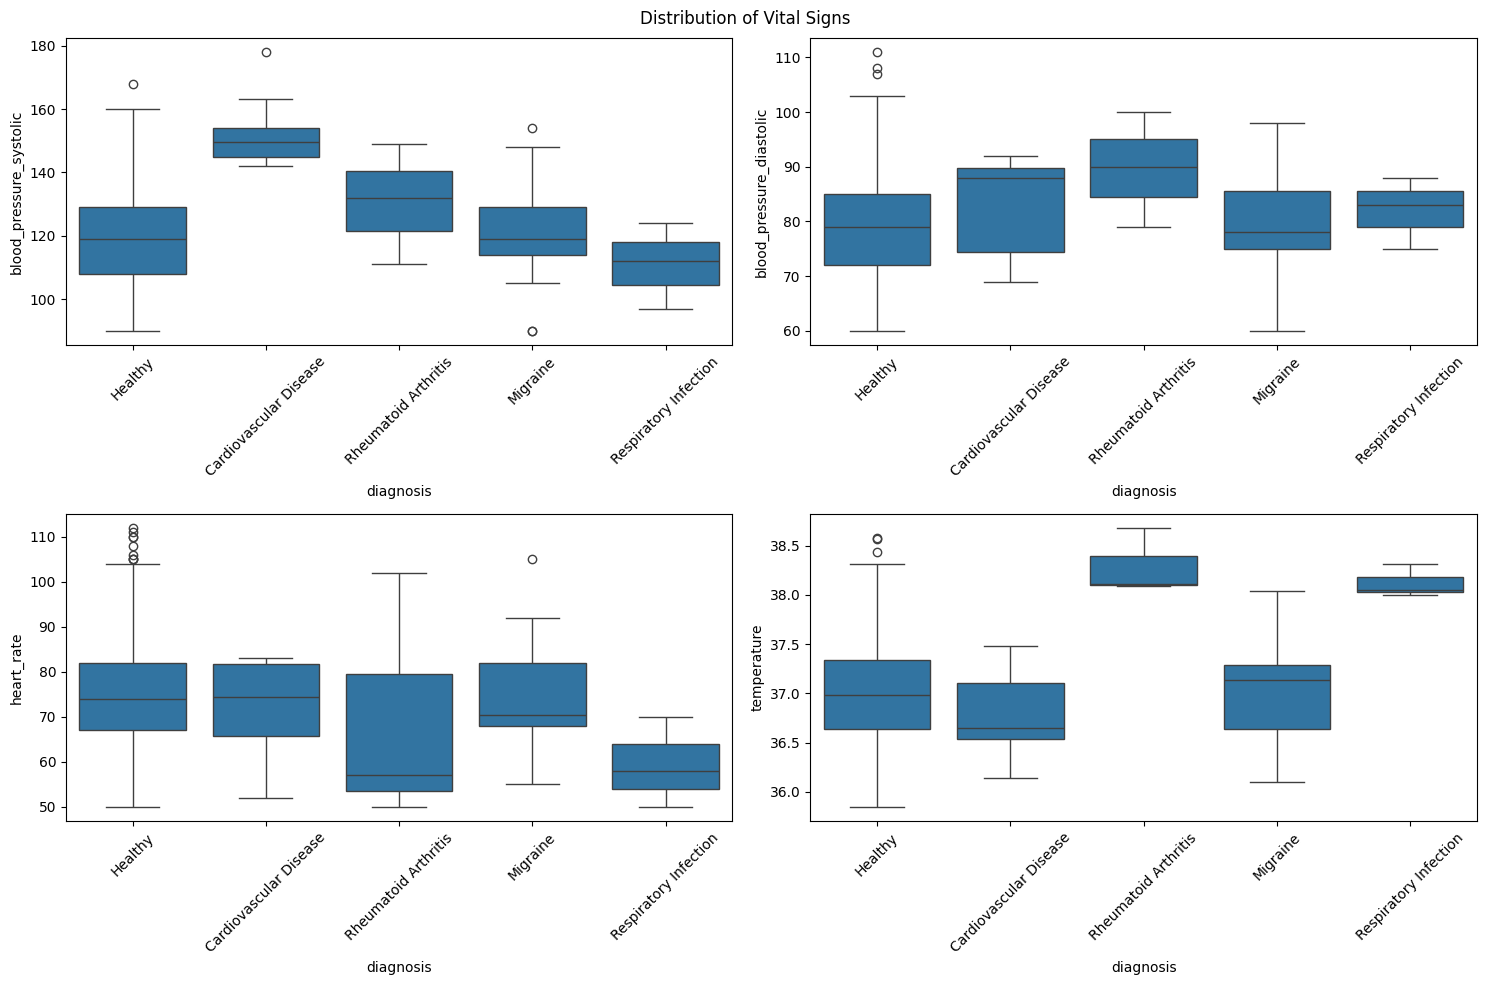

In [9]:
vital_signs = ['blood_pressure_systolic', 'blood_pressure_diastolic', 'heart_rate', 'temperature']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Vital Signs')

for i, vital in enumerate(vital_signs):
    row=i//2
    col=i%2
    sns.boxplot(data=df, x='diagnosis',y=vital,ax=axes[row,col])
    axes[row,col].tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()

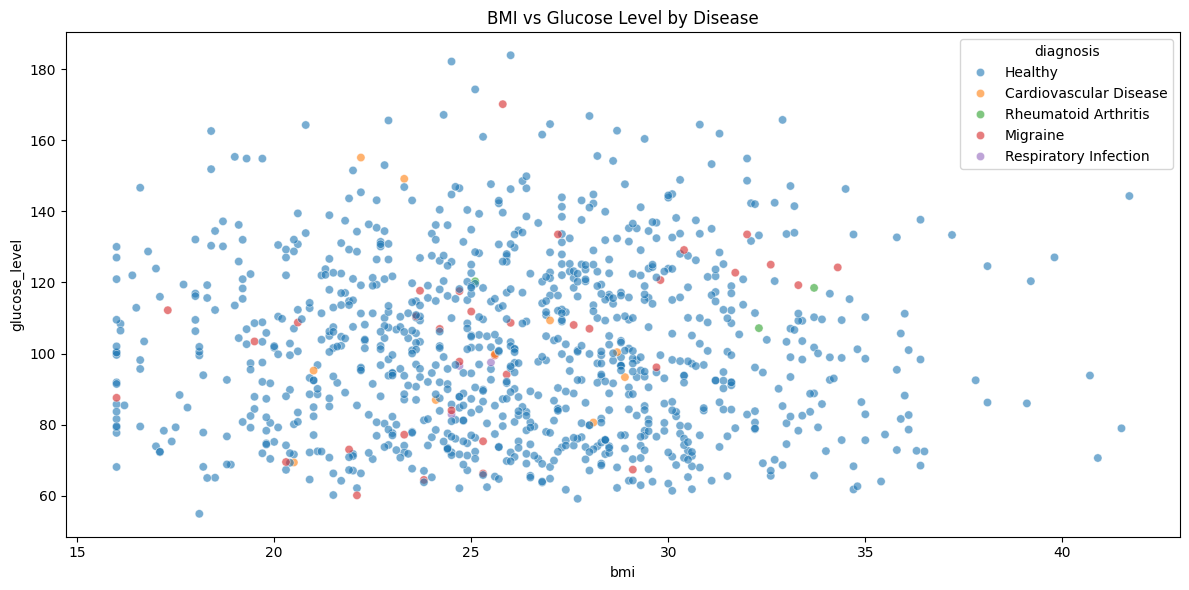

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='bmi', y='glucose_level', hue='diagnosis', alpha=0.6)
plt.title('BMI vs Glucose Level by Disease')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

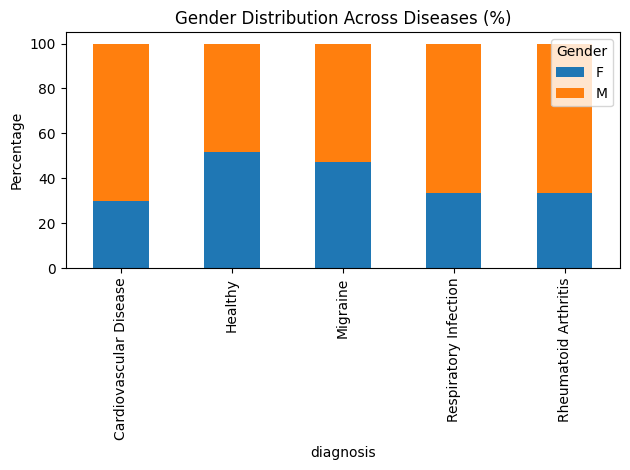

In [11]:
plt.figure(figsize=(12, 6))
gender_disease = pd.crosstab(df['diagnosis'], df['gender'], normalize='index') * 100
gender_disease.plot(kind='bar', stacked=True)
plt.title('Gender Distribution Across Diseases (%)')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [12]:
# 10. Statistical Tests
print("\nStatistical Tests:")
# ANOVA test for age differences among diseases
f_statistic, p_value = stats.f_oneway(*[group['age'].values for name, group in df.groupby('diagnosis')])
print("\nANOVA Test for Age Differences among Diseases:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
# Chi-square test for gender and disease association
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['diagnosis'], df['gender']))
print("\nChi-square Test for Gender and Disease Association:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")


Statistical Tests:

ANOVA Test for Age Differences among Diseases:
F-statistic: 1.5628
p-value: 0.1821

Chi-square Test for Gender and Disease Association:
Chi-square statistic: 2.8491
p-value: 0.5834


In [15]:
# 11. Descriptive Statistics by Disease
print("\nKey Metrics by Disease:")
disease_stats = df.groupby('diagnosis').agg({
    'age': ['mean', 'std'],
    'bmi': ['mean', 'std'],
    'glucose_level': ['mean', 'std'],
    'cholesterol': ['mean', 'std']
}).round(2)
display(disease_stats)


Key Metrics by Disease:


age           bmi       glucose_level         \
                         mean    std   mean   std          mean    std   
diagnosis                                                                
Cardiovascular Disease  37.30  10.37  24.94  3.17        103.93  27.77   
Healthy                 44.87  14.32  26.12  4.79        101.48  24.20   
Migraine                48.91  13.91  25.73  4.41        103.02  24.55   
Respiratory Infection   42.00  13.00  24.90  0.53         92.31   8.15   
Rheumatoid Arthritis    51.33  12.90  30.37  4.61        115.31   7.14   

                       cholesterol         
                              mean    std  
diagnosis                                  
Cardiovascular Disease       196.1  25.44  
Healthy                      191.4  35.78  
Migraine                     181.5  35.57  
Respiratory Infection        193.0  23.90  
Rheumatoid Arthritis         186.0  24.58

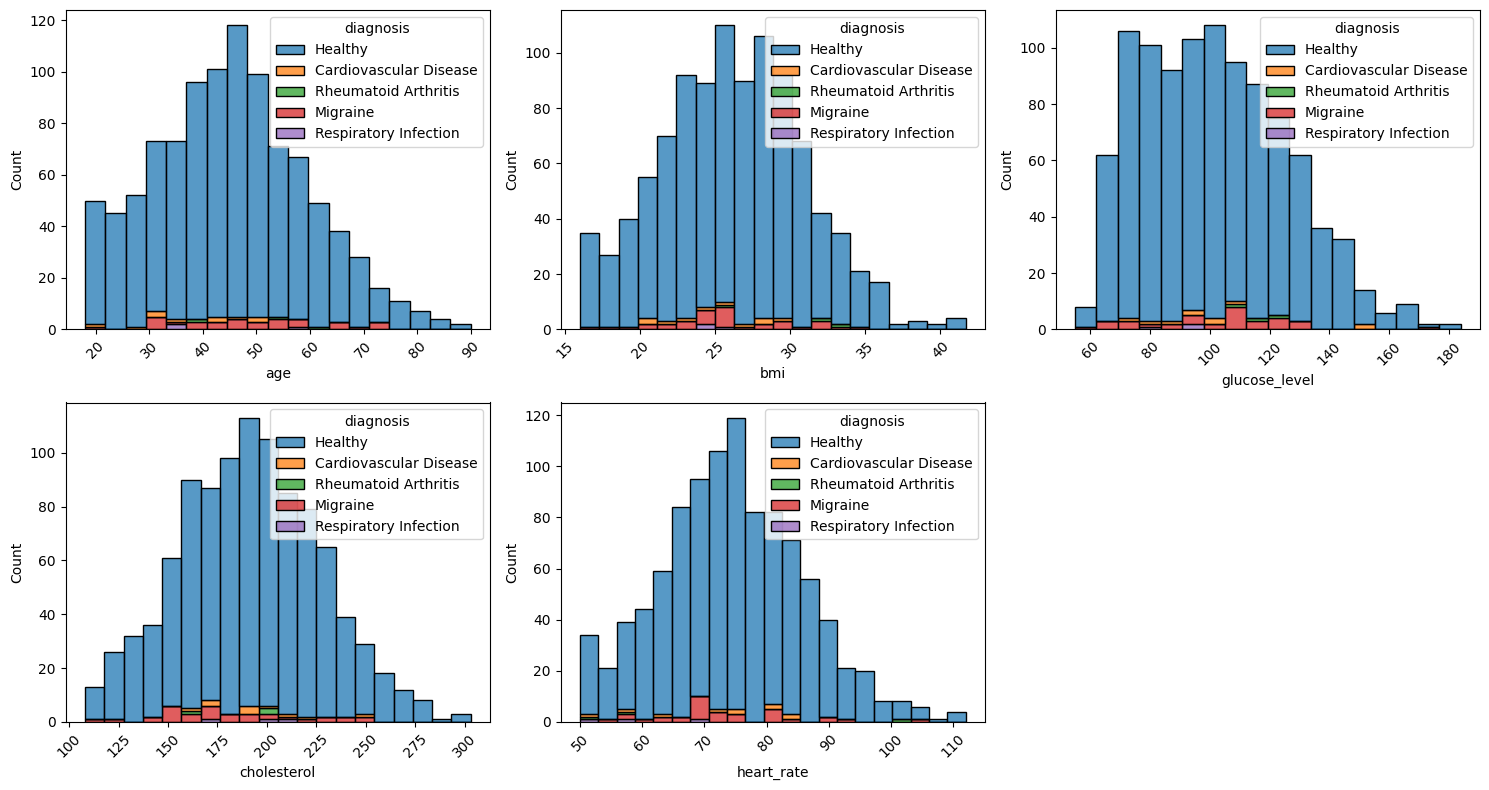

In [17]:
def plot_feature_distributions(df, features, ncols=3):
    nrows=(len(features)+ncols-1)// ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4*nrows))
    axes=axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(data=df, x=feature, hue='diagnosis', multiple="stack", ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

numerical_features=['age','bmi','glucose_level','cholesterol','heart_rate']
plot_feature_distributions(df, numerical_features)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings

warnings.filterwarnings("ignore", category=UserWarning)


Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.9850
Cross-validation Score: 0.9662 (+/- 0.0170)

Classification Report:
                        precision    recall  f1-score   support

Cardiovascular Disease       0.99      0.99      0.99       191
  Rheumatoid Arthritis       1.00      1.00      1.00         7
              Migraine       0.00      0.00      0.00         1
 Respiratory Infection       0.00      0.00      0.00         1

              accuracy                           0.98       200
             macro avg       0.50      0.50      0.50       200
          weighted avg       0.98      0.98      0.98       200



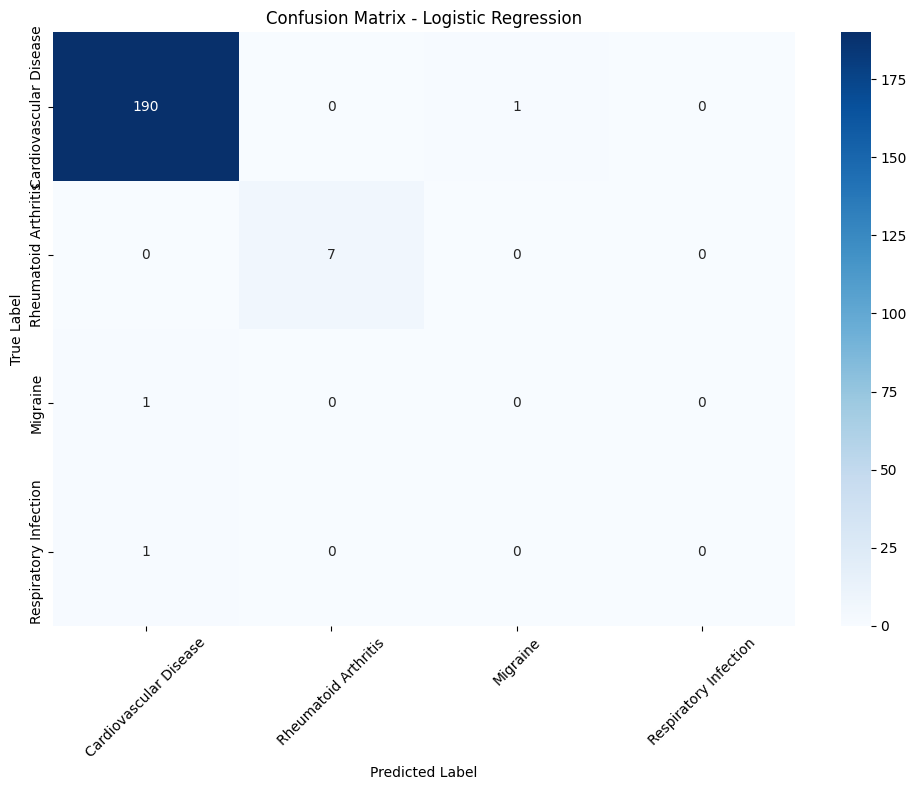


Training Decision Tree...
Decision Tree Results:
Accuracy: 0.9800
Cross-validation Score: 0.9775 (+/- 0.0187)

Classification Report:
                        precision    recall  f1-score   support

               Healthy       0.00      0.00      0.00         0
Cardiovascular Disease       0.99      0.99      0.99       191
  Rheumatoid Arthritis       1.00      1.00      1.00         7
              Migraine       0.00      0.00      0.00         1
 Respiratory Infection       0.00      0.00      0.00         1

              accuracy                           0.98       200
             macro avg       0.40      0.40      0.40       200
          weighted avg       0.98      0.98      0.98       200



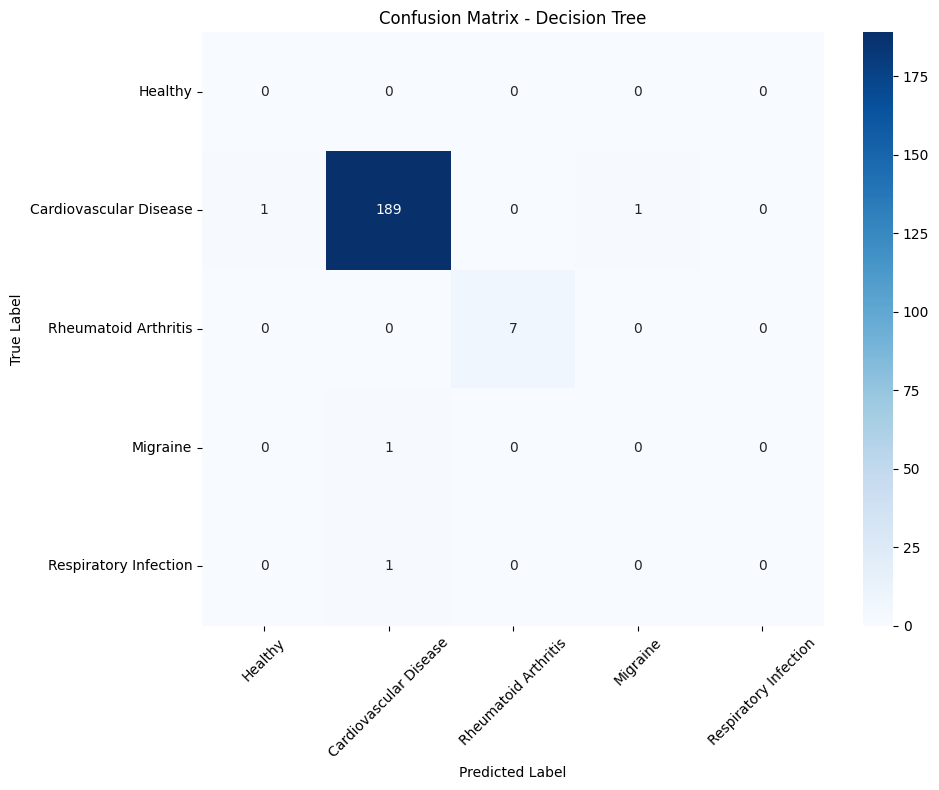


Training Random Forest...
Random Forest Results:
Accuracy: 0.9850
Cross-validation Score: 0.9662 (+/- 0.0127)

Classification Report:
                        precision    recall  f1-score   support

Cardiovascular Disease       0.98      1.00      0.99       191
  Rheumatoid Arthritis       1.00      0.86      0.92         7
              Migraine       0.00      0.00      0.00         1
 Respiratory Infection       0.00      0.00      0.00         1

              accuracy                           0.98       200
             macro avg       0.50      0.46      0.48       200
          weighted avg       0.98      0.98      0.98       200



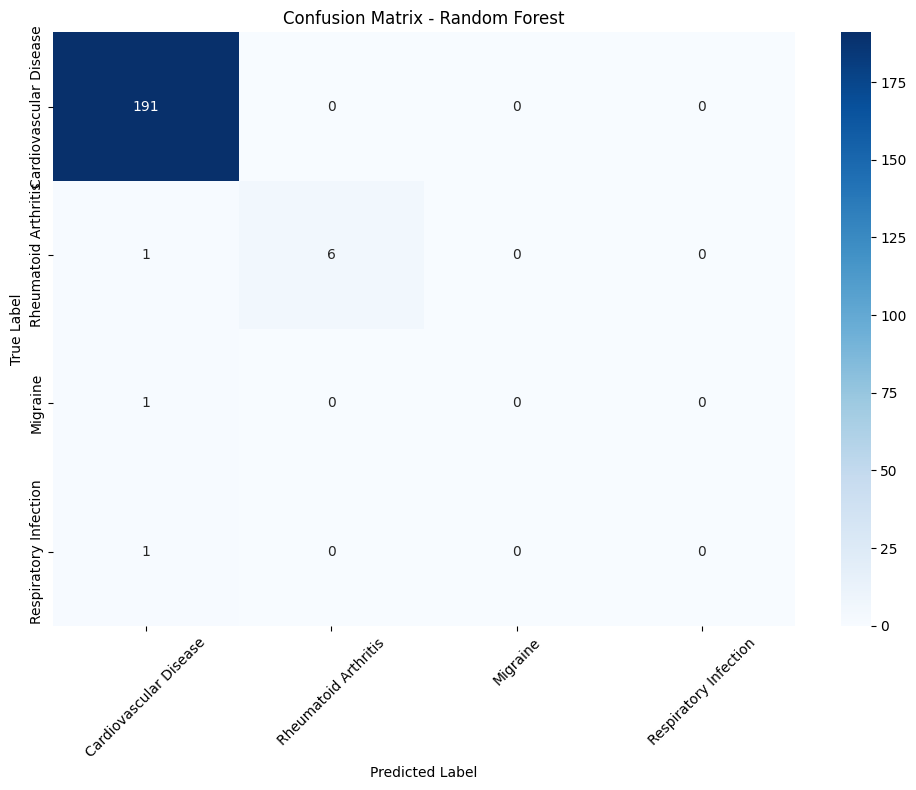


Training Gradient Boosting...
Gradient Boosting Results:
Accuracy: 0.9900
Cross-validation Score: 0.9812 (+/- 0.0237)

Classification Report:
                        precision    recall  f1-score   support

Cardiovascular Disease       0.99      1.00      0.99       191
  Rheumatoid Arthritis       1.00      1.00      1.00         7
              Migraine       0.00      0.00      0.00         1
 Respiratory Infection       0.00      0.00      0.00         1

              accuracy                           0.99       200
             macro avg       0.50      0.50      0.50       200
          weighted avg       0.98      0.99      0.99       200



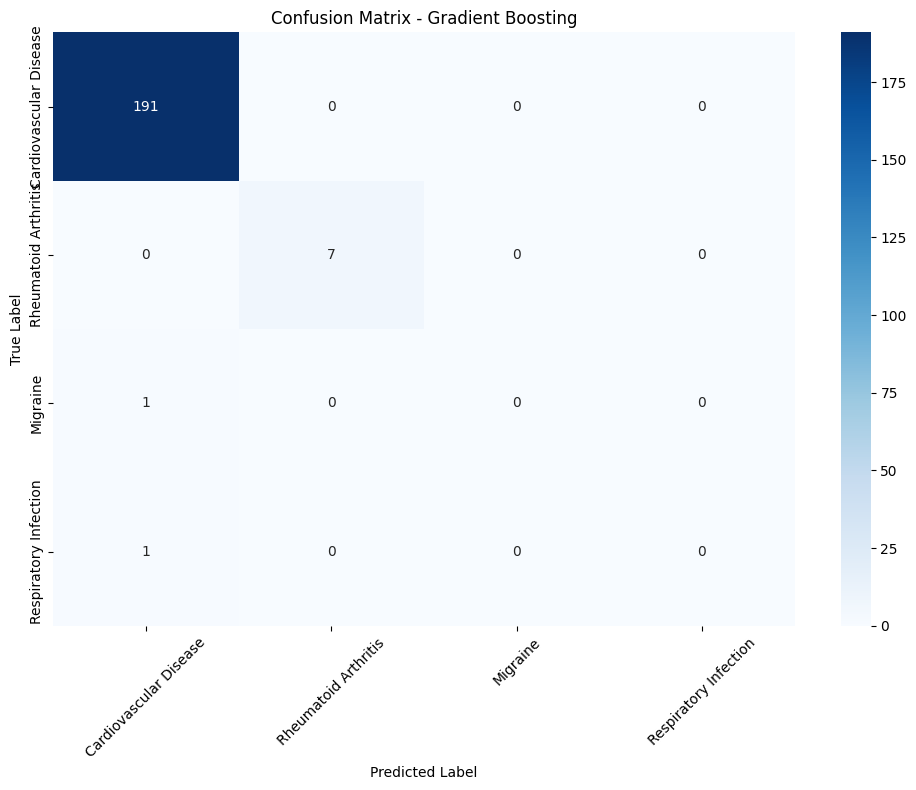


Training SVM...
SVM Results:
Accuracy: 0.9550
Cross-validation Score: 0.9487 (+/- 0.0050)

Classification Report:
                        precision    recall  f1-score   support

Cardiovascular Disease       0.95      1.00      0.98       191
  Rheumatoid Arthritis       0.00      0.00      0.00         7
              Migraine       0.00      0.00      0.00         1
 Respiratory Infection       0.00      0.00      0.00         1

              accuracy                           0.95       200
             macro avg       0.24      0.25      0.24       200
          weighted avg       0.91      0.95      0.93       200



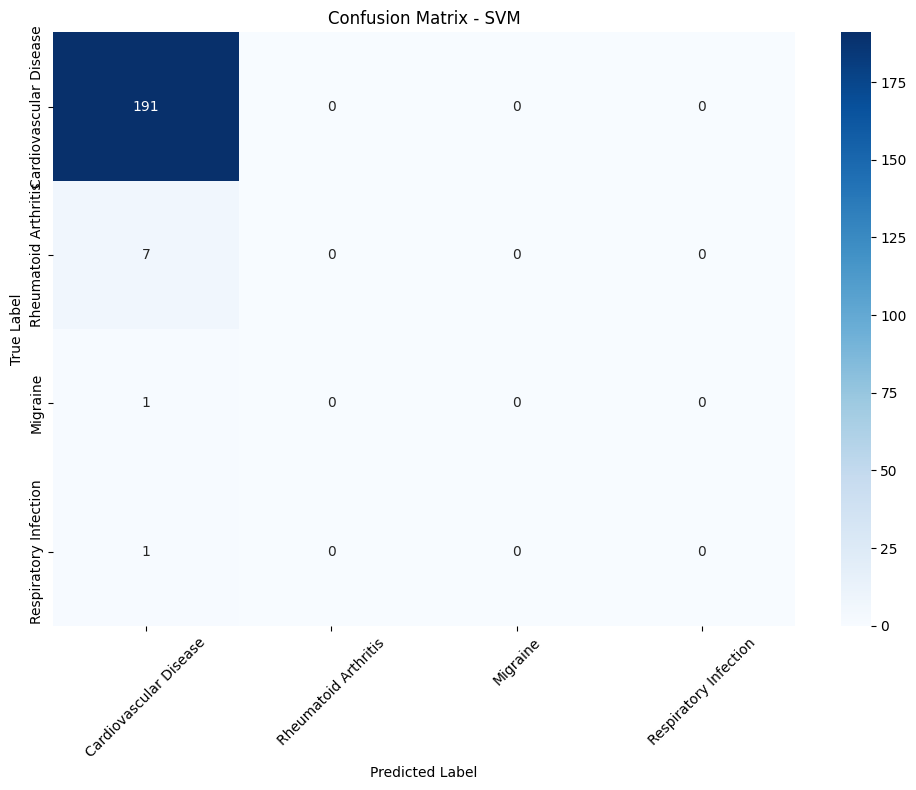


Training KNN...
KNN Results:
Accuracy: 0.9600
Cross-validation Score: 0.9462 (+/- 0.0100)

Classification Report:
                        precision    recall  f1-score   support

Cardiovascular Disease       0.96      1.00      0.98       191
  Rheumatoid Arthritis       1.00      0.14      0.25         7
              Migraine       0.00      0.00      0.00         1
 Respiratory Infection       0.00      0.00      0.00         1

              accuracy                           0.96       200
             macro avg       0.49      0.29      0.31       200
          weighted avg       0.95      0.96      0.94       200



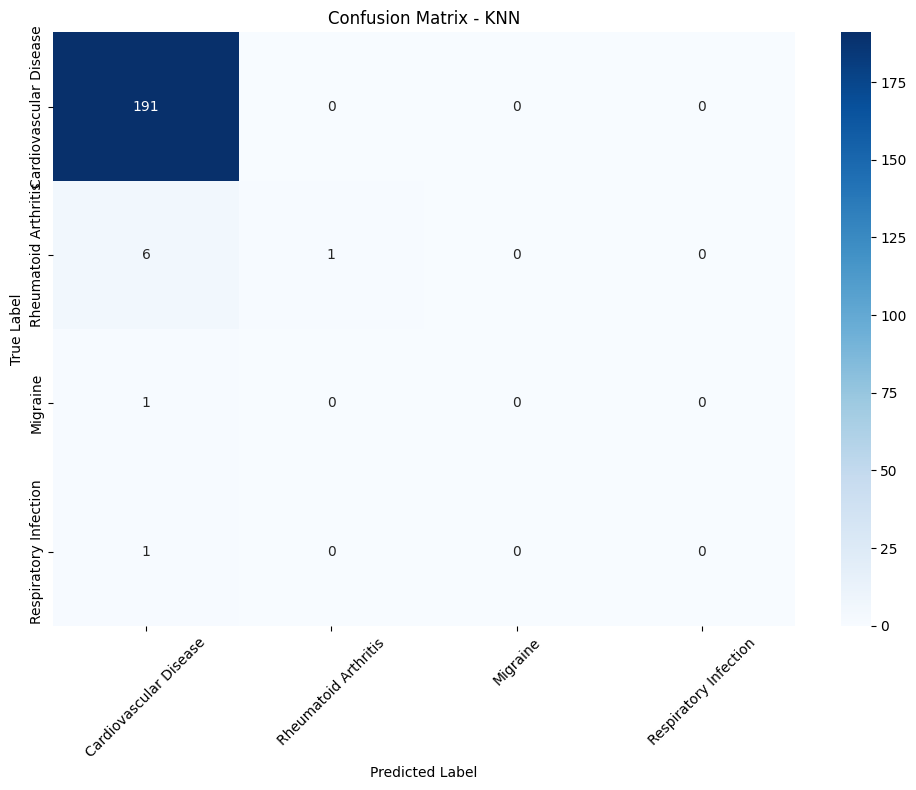


Training XGBoost...
XGBoost Results:
Accuracy: 0.9900
Cross-validation Score: 0.9912 (+/- 0.0127)

Classification Report:
                        precision    recall  f1-score   support

Cardiovascular Disease       0.99      1.00      0.99       191
  Rheumatoid Arthritis       1.00      1.00      1.00         7
              Migraine       0.00      0.00      0.00         1
 Respiratory Infection       0.00      0.00      0.00         1

              accuracy                           0.99       200
             macro avg       0.50      0.50      0.50       200
          weighted avg       0.98      0.99      0.99       200



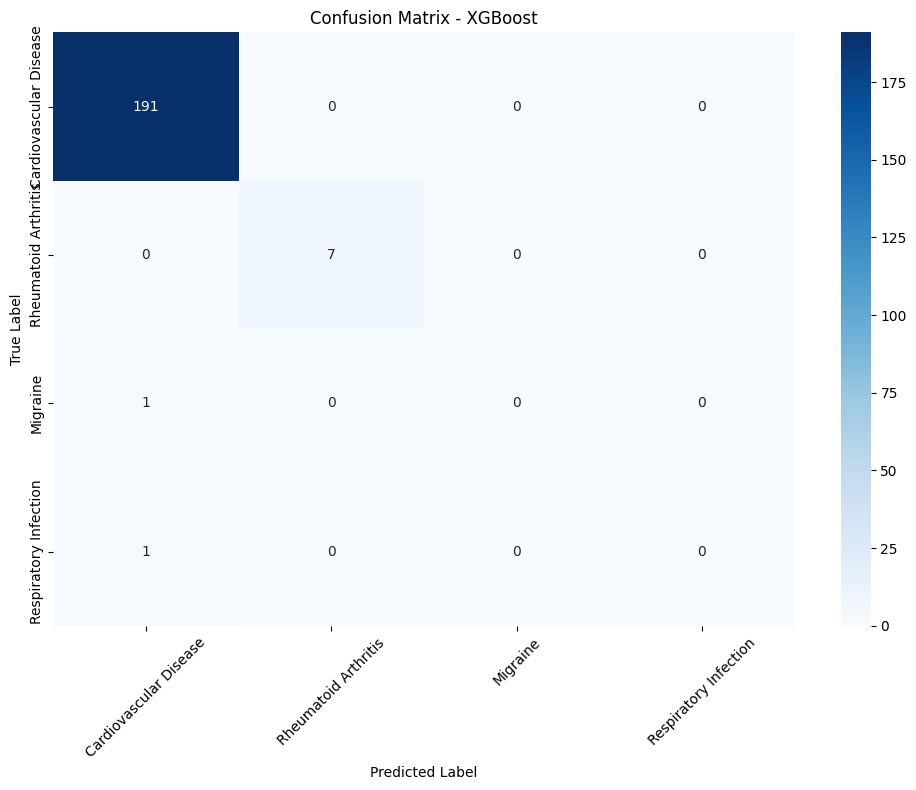

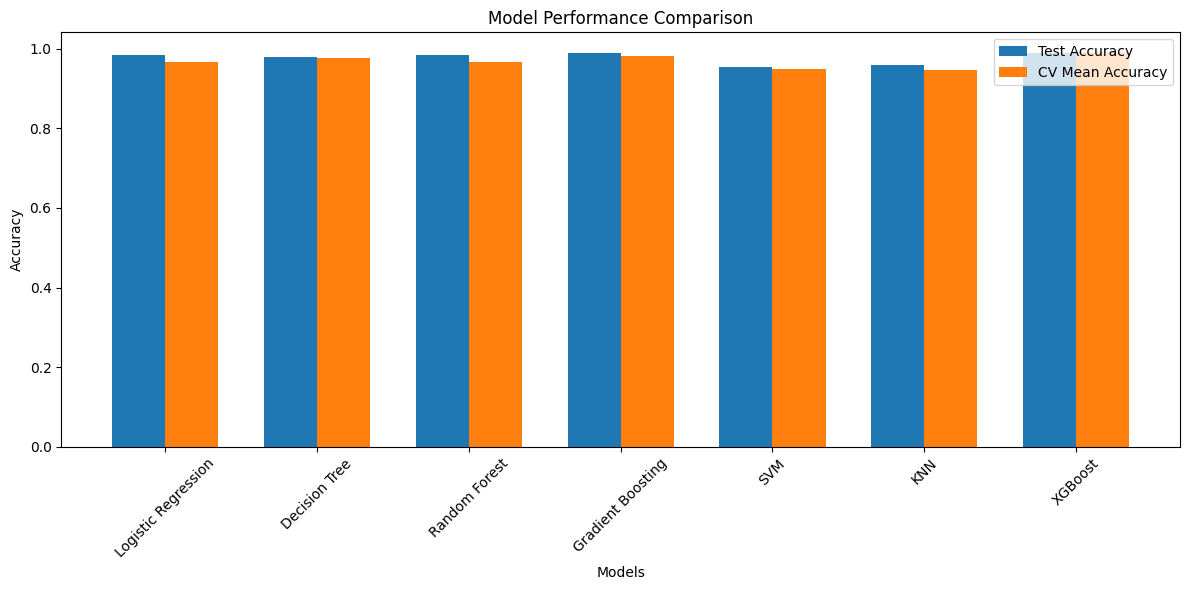


Best performing model: XGBoost
Cross-validation accuracy: 0.9912


In [8]:


def prepare_data(file_path='medical_dataset.csv'):
    df = pd.read_csv(file_path)
    X = df.drop(['diagnosis', 'patient_id'], axis=1)
    y = df['diagnosis']
    unique_classes = y.unique()

    # Label encoding
    le_gender = LabelEncoder()
    le_blood = LabelEncoder()
    le_diagnosis = LabelEncoder()

    X['gender'] = le_gender.fit_transform(X['gender'])
    X['blood_type'] = le_blood.fit_transform(X['blood_type'])
    y = le_diagnosis.fit_transform(y)

    encoders = {
        'gender': le_gender,
        'blood_type': le_blood,
        'diagnosis': le_diagnosis,
        'unique_classes': unique_classes
    }

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, encoders, scaler

# ---------- Model Training ----------
def train_and_evaluate_models(X_train, X_test, y_train, y_test, encoders):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'XGBoost': xgb.XGBClassifier()
    }

    results = {}
    class_names = list(encoders['unique_classes'])

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Add cross-validation scores
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)

        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {
            'accuracy': accuracy,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred,
            'model': model
        }

        print(f"{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Cross-validation Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

        unique_labels = np.unique(np.concatenate([y_test, y_pred]))
        present_class_names = [class_names[i] for i in unique_labels]

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=present_class_names))

        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=present_class_names,
                    yticklabels=present_class_names)
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    return results

# ---------- Plot Comparison ----------
def plot_model_comparison(results):
    models = list(results.keys())
    accuracies = [results[model]['accuracy'] for model in models]
    cv_means = [results[model]['cv_mean'] for model in models]

    plt.figure(figsize=(12, 6))
    x = np.arange(len(models))
    width = 0.35

    plt.bar(x - width / 2, accuracies, width, label='Test Accuracy')
    plt.bar(x + width / 2, cv_means, width, label='CV Mean Accuracy')

    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Performance Comparison')
    plt.xticks(x, models, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------- Get Best Model ----------
def get_best_model(results):
    best_model = max(results.items(), key=lambda x: x[1]['cv_mean'])
    return best_model[0], best_model[1]['cv_mean'], best_model[1]['model']

# ---------- Predict New Data ----------
def predict_disease(model, new_data, encoders, scaler):
    if isinstance(new_data, pd.DataFrame):
        if 'gender' in new_data.columns:
            new_data['gender'] = encoders['gender'].transform(new_data['gender'])
        if 'blood_type' in new_data.columns:
            new_data['blood_type'] = encoders['blood_type'].transform(new_data['blood_type'])

    new_data_scaled = scaler.transform(new_data)
    prediction_encoded = model.predict(new_data_scaled)
    prediction = encoders['diagnosis'].inverse_transform(prediction_encoded)
    return prediction

# ---------- Main ----------
if __name__ == "__main__":
    X_train, X_test, y_train, y_test, encoders, scaler = prepare_data()
    results = train_and_evaluate_models(X_train, X_test, y_train, y_test, encoders)
    plot_model_comparison(results)
    best_model_name, best_score, model = get_best_model(results)
    print(f"\nBest performing model: {best_model_name}")
    print(f"Cross-validation accuracy: {best_score:.4f}")
